# Decision Trees

- Building a decision tree for the iris dataset

- Plotting the decision tree using graphviz

- Using GridSearchCV to perform hyperparameter tuining for decision tree

- Plotting the decision boundary for a decision tree classifier

- Bulding a decision tree forest of 1000 trees

- Improving accuracy by taking majority vote for each test instance accross all trees

In [170]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

iris = load_iris()
X = iris['data'][:, 2:]
y = iris['target']

tree_clf = DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

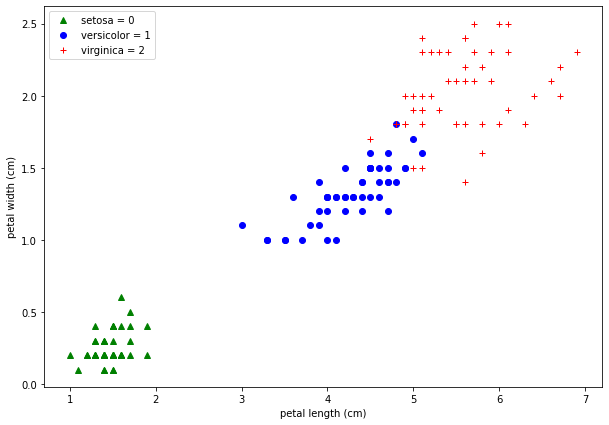

In [18]:
plt.figure(figsize = (10, 7))
plt.plot(X[y == 0][:, 0], X[y == 0][:, 1], 'g^', label = iris.target_names[0] + " = 0")
plt.plot(X[y == 1][:, 0], X[y == 1][:, 1], 'bo', label = iris.target_names[1] + " = 1")
plt.plot(X[y == 2][:, 0], X[y == 2][:, 1], 'r+', label = iris.target_names[2] + " = 2")
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.legend(loc = "upper left")

[Text(223.2, 317.09999999999997, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(111.6, 190.26, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(334.79999999999995, 190.26, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(223.2, 63.420000000000016, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(446.4, 63.420000000000016, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

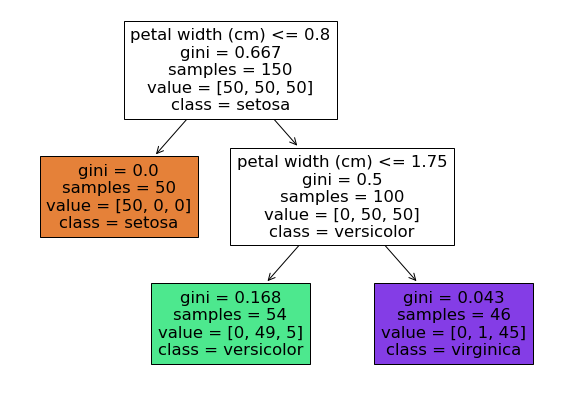

In [27]:
# Plotting the decision tree with tree.plot_tree

from sklearn import tree

plt.figure(figsize = (10, 7))
tree.plot_tree(tree_clf, 
              feature_names = iris.feature_names[2:],
              class_names = iris.target_names,
              filled = True)

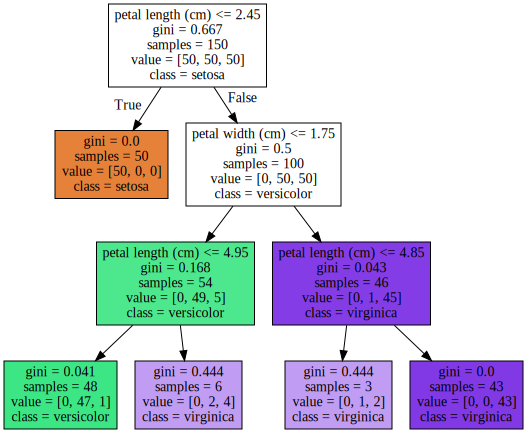

In [33]:
# Plotting the Decision Tree with graphviz

import graphviz

dot = tree.export_graphviz(tree_clf, out_file = None,
                           feature_names = iris.feature_names[2:],
                           class_names = iris.target_names,
                           filled = True)
graph = graphviz.Source(dot, format = "png")
graph

## Decision Tree Hyperparameter Tuining Using GridSearchCV

In [157]:
# Using a sample make_moons dataset

from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 500, noise = 0.4, random_state = 42)

index_1 = (y == 1)
index_0 = (y == 0)

(-2.0, 3.5, -2.0, 2.0)

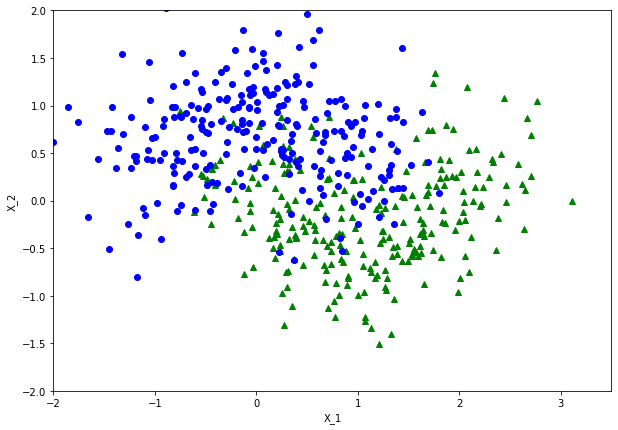

In [158]:
plt.figure(figsize = (10, 7))
plt.plot(X[index_1][:, 0], X[index_1][:, 1], 'g^')
plt.plot(X[index_0][:, 0], X[index_0][:, 1], 'bo')
plt.xlabel("X_1", fontsize=10)
plt.ylabel("X_2", fontsize=10)
plt.axis([-2, 3.5, -2, 2])

In [159]:
# Splitting data into train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [160]:
# Defining grid search parameter ranges and intializing grid search

parameters = {'criterion' : ['gini', 'entropy'],
              'max_leaf_nodes' : list(range(2, 50)),
              'min_samples_split': [2, 3, 4, 5, 6]}

from sklearn.model_selection import GridSearchCV

dec_tree = DecisionTreeClassifier(random_state = 42)
grid_clf = GridSearchCV(dec_tree, parameters, n_jobs= -1, verbose = 1, cv = 3)

grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:    1.7s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                       

In [161]:
print("Best Model Parameters")
grid_clf.best_estimator_.get_params()

Best Model Parameters


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 25,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

In [162]:
# Score on Test set

grid_clf.best_estimator_.score(X_test, y_test)

0.8133333333333334

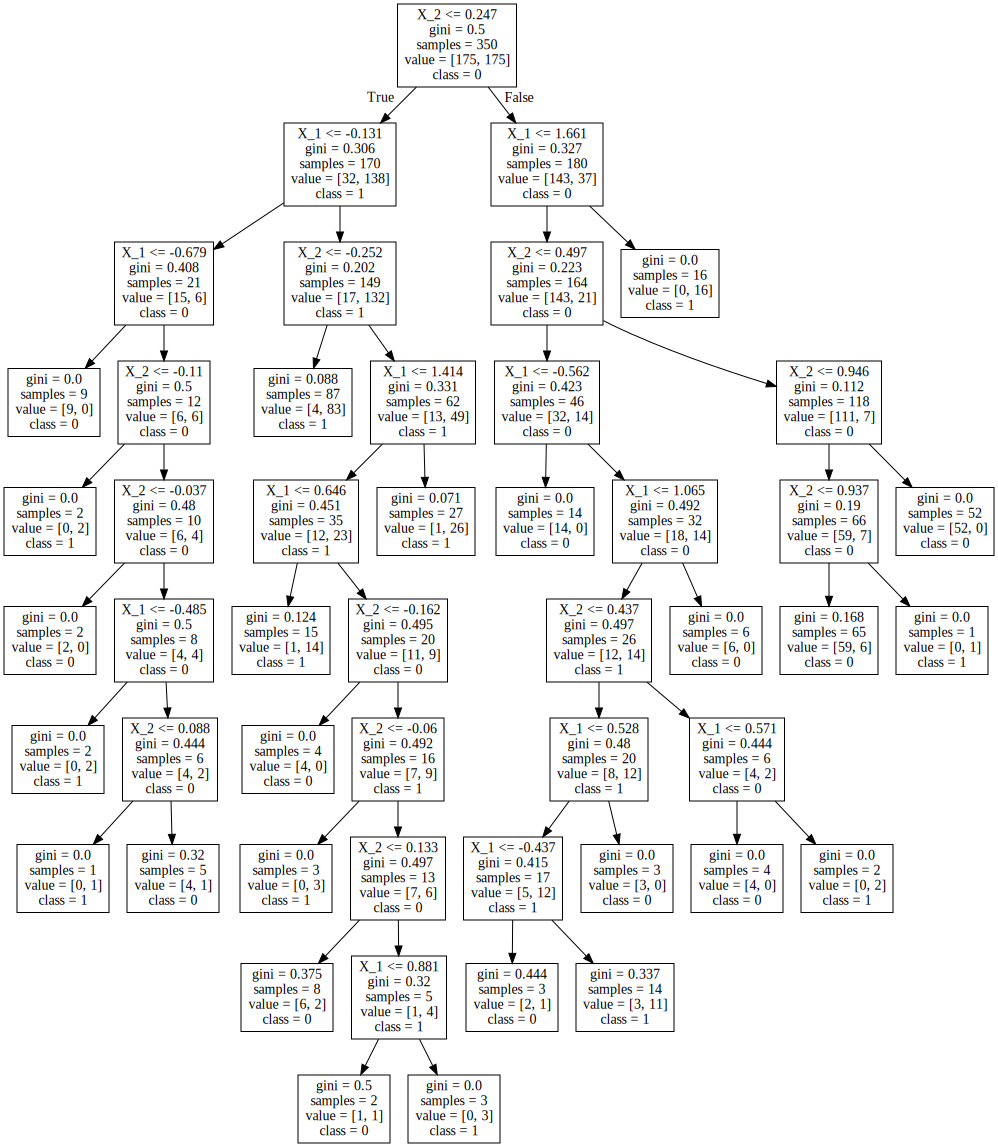

In [163]:
# Plotting the Decision Tree with graphviz

import graphviz
from sklearn import tree

dot = tree.export_graphviz(grid_clf.best_estimator_, out_file = None,
                     feature_names = ['X_1', 'X_2'],
                     class_names = ['0', '1'])

graphviz.Source(dot, format = "png")

(-2.0, 3.5, -2.0, 2.0)

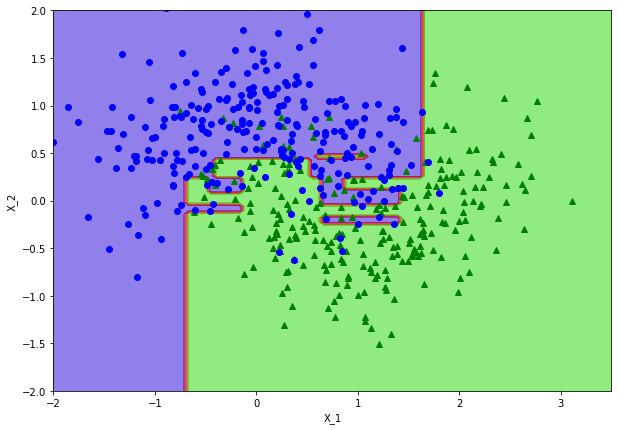

In [164]:
# Plotting the decision tree boundary 

import numpy as np

x1s = np.linspace(-2, 3.5, 100)
x2s = np.linspace(-2, 2, 100)

x1, x2 = np.meshgrid(x1s, x2s)
X_sample = np.c_[x1.ravel(), x2.ravel()]

y_predict = grid_clf.best_estimator_.predict(X_sample).reshape(x1.shape)

plt.figure(figsize = (10, 7))
plt.plot(X[index_1][:, 0], X[index_1][:, 1], 'g^')
plt.plot(X[index_0][:, 0], X[index_0][:, 1], 'bo')
plt.contourf(x1, x2, y_predict, cmap=plt.cm.brg, alpha=0.5)

plt.xlabel("X_1", fontsize=10)
plt.ylabel("X_2", fontsize=10)
plt.axis([-2, 3.5, -2, 2])

## Splitting training data into 1000 random sub-training sets to be fed to 1000 decision trees to simulate a Random forest

In [165]:
# Each randomly made mini training set has 50 instances

from sklearn.metrics import accuracy_score
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 50
train_sets = []

s = ShuffleSplit(n_splits = 1000, test_size = len(X_train) - n_instances, random_state = 42)

for train_index, test_index in s.split(X_train):

    X_mini_train = X[train_index]
    y_mini_train = y[train_index]
    train_sets.append((X_min_train, y_min_train))

In [166]:
# Forming a forest by cloning decision tree with best param into a list
# Zipping each randomly selected mini training set with a decision tree classifier
# Training each decision tree with its corresponding mini training set
# Making prediction on test set by each decision tree in forest

from sklearn.base import clone

accuracy_scores = []
forest = [grid_clf.best_estimator_ for _ in range(n_trees)]

for tree, (X_mini_train, y_mini_train) in zip(forest, train_sets):
    
    tree.fit(X_mini_train, y_mini_train)
    y_pred = tree.predict(X_test)
    
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.7879066666666665

In [167]:
# Generating prediction on test set by each decision tree
# Y_pred row represents a decision tree
# Y_pred column represents the number of instances in test set

Y_pred = np.empty([n_trees, len(X_test)], dtype = np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [168]:
# Taking mode of each column of Y_pred
# Which represents a majority vote for each instance of test set
# Accross all 1000 decision trees

from scipy.stats import mode

Y_pred_majority_votes, n_votes = mode(Y_pred, axis = 0)

In [169]:
# Getting Accuracy based on the process of taking a majority vote
# Accross a forest of decision trees

accuracy_score(y_test, Y_pred_majority_votes.reshape([-1]))

0.84